In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

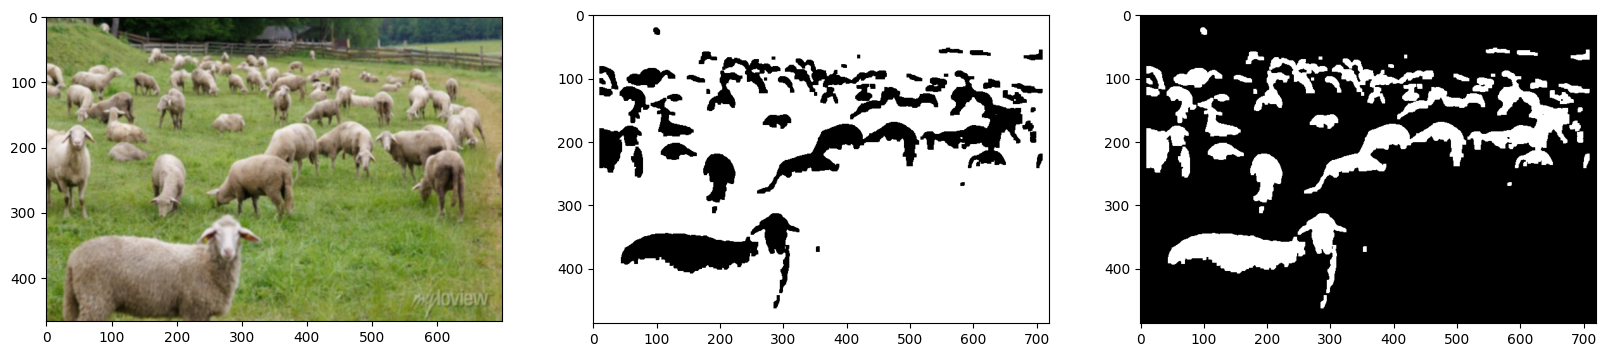

In [2]:
image = cv2.imread("./imgs/sheep heard.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# apply a gaussian blur to the image
image = cv2.GaussianBlur(image, (5, 5), 0)

# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 115, 255, cv2.THRESH_BINARY)[1]

# add a border to the image
bw = cv2.copyMakeBorder(bw, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[0, 0, 0])

bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
# invert the image
bw = cv2.bitwise_not(bw)
# convert to 0 and 1 values
bw[bw > 0] = 1

# remove noise from the black and white image
kernel = np.ones((5,5),np.uint8)
bw = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# add a white border to the image

bw_inverted = cv2.bitwise_not(bw)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(image)
ax[1].imshow(bw, cmap="gray")
ax[2].imshow(bw_inverted, cmap="gray")
plt.show()

: 